In [1]:
#importing pandas 
import pandas as pd

## 1.> Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
##reading excel file which contain sheet name data only
survey=pd.read_excel('Sample Survey.xlsx',sheet_name='Data')
survey.head() #read top 5 rows

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [3]:
survey.info()  # getting information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

## 2. How many samples were collected on each day?

In [4]:
survey.head()  # reading top 5 rows

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [5]:
## number of samples collected each day
sample_collected_each_day=survey.groupby(['collection_date']).agg({'response_id':'count'}).reset_index()
sample_collected_each_day  #Final sample collected each day

,collection_date,response_id
0,2020-08-24,1479
1,2020-08-25,998
2,2020-08-26,598
3,2020-08-27,665
4,2020-08-28,761
5,2020-08-29,620
6,2020-08-30,582
7,2020-08-31,557
8,2020-09-01,607


## 3. What proportion of the total respondents were aged less than 45?

In [6]:
import re
def cleaned(data):
    data=re.sub(r'[^0-9]','',str(data))
    return data
survey['age']=survey['age'].apply(cleaned).astype(int)   

In [7]:
less_than_45_years=survey[survey['age']<45]  #taking only those data which has age less than 45
count_less_than_45_years=len(less_than_45_years)      #count total data which has age less than 45 years
count_less_than_45_years                              #final count

6399

## 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:

In [8]:
def age_group(data):
    if data >=18 and data<25:
        return "18-25"
    if data >=25 and data<40:
        return "25-40"
    if data >=40 and data<55:
        return "40-55"
    if data >55:
        return "55+"
survey['age_group']=survey['age'].apply(age_group)
    

In [9]:
survey.columns  # new columns age group is added

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight', 'age_group'],
      dtype='object')

In [10]:
survey.head(10)  #printing top 10 rows of survey dataframe

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
5,6,2020-08-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,25-40
6,7,2020-08-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,25-40
7,8,2020-08-24,Rural,Professional Education,"₹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,Male,186,ST,0.340652,25-40
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
9,10,2020-08-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,25-40


## 5. How many samples were collected for each age-group? Which age-group had the most samples?

In [11]:
## number of samples collected by each group
samples_collected_by_group=survey.groupby('age_group').agg({'response_id':'count'}).reset_index()
samples_collected_by_group

,age_group,response_id
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,108


In [12]:
## group with more samples
most_sampled_group=samples_collected_by_group.sort_values(by='response_id',ascending=False).reset_index(drop=True)
most_sampled_group['age_group'][0]  #age group with maximum number of samples

'25-40'

## 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [13]:
opted_for_rjd_party=survey[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')]
len(opted_for_rjd_party)        #responded opted for both the Vote_Now & Past_Vote

811

## 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [14]:
sample_collected_each_day=sample_collected_each_day.rename(columns={'response_id':'toal sample_collected'})    #as calculated above
sample_collected_each_day #created primary key to join with the table with satisfied with cm table

,collection_date,toal sample_collected
0,2020-08-24,1479
1,2020-08-25,998
2,2020-08-26,598
3,2020-08-27,665
4,2020-08-28,761
5,2020-08-29,620
6,2020-08-30,582
7,2020-08-31,557
8,2020-09-01,607


In [15]:
satisfied_with_cm=survey[survey['CM_satisfaction']=='Fully Satisfied']
satisfied_with_cm=satisfied_with_cm.groupby(['collection_date']).agg({'response_id':'count'}).reset_index()
satisfied_with_cm=satisfied_with_cm.rename(columns={'response_id':'satisfied_from_cm_count'})
satisfied_with_cm

,collection_date,satisfied_from_cm_count
0,2020-08-24,146
1,2020-08-25,95
2,2020-08-26,59
3,2020-08-27,54
4,2020-08-28,92
5,2020-08-29,73
6,2020-08-30,65
7,2020-08-31,62
8,2020-09-01,75


In [16]:
## merging satisfied_with_cm and sample_collected_each_day to get proporton of candidates result
cm_satisfied_proportion=sample_collected_each_day.merge(satisfied_with_cm,how='left',left_on='collection_date',right_on='collection_date')
cm_satisfied_proportion=cm_satisfied_proportion[['collection_date','toal sample_collected','satisfied_from_cm_count']]
cm_satisfied_proportion     #took relevant column that will be helping the find the insight

,collection_date,toal sample_collected,satisfied_from_cm_count
0,2020-08-24,1479,146
1,2020-08-25,998,95
2,2020-08-26,598,59
3,2020-08-27,665,54
4,2020-08-28,761,92
5,2020-08-29,620,73
6,2020-08-30,582,65
7,2020-08-31,557,62
8,2020-09-01,607,75


In [17]:
def proportion(data):
    return data[-1]/data[-2]
cm_satisfied_proportion['respondent_proportion']=cm_satisfied_proportion.apply(proportion,axis=1)

In [18]:
cm_satisfied_proportion  #final proportion of respondent fuly satisfied with cm

,collection_date,toal sample_collected,satisfied_from_cm_count,respondent_proportion
0,2020-08-24,1479,146,0.098715
1,2020-08-25,998,95,0.095190
2,2020-08-26,598,59,0.098662
3,2020-08-27,665,54,0.081203
4,2020-08-28,761,92,0.120894
5,2020-08-29,620,73,0.117742
6,2020-08-30,582,65,0.111684
7,2020-08-31,557,62,0.111311
8,2020-09-01,607,75,0.123558


## 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [19]:
dissatisfied_with_MLA=survey[survey['MLA_satisfaction']=='Fully Dissatisfied'] #filtering data for full dissatisfied with mla
dissatisfied_with_MLA=dissatisfied_with_MLA.groupby(['collection_date']).agg({'response_id':'count'}).reset_index()
dissatisfied_with_MLA=dissatisfied_with_MLA.rename(columns={'response_id':'dissatisfied_from_MLA_count'})
dissatisfied_with_MLA

,collection_date,dissatisfied_from_MLA_count
0,2020-08-24,887
1,2020-08-25,630
2,2020-08-26,353
3,2020-08-27,403
4,2020-08-28,462
5,2020-08-29,350
6,2020-08-30,361
7,2020-08-31,321
8,2020-09-01,385


In [20]:
MLA_dissatisfaction_proportion=sample_collected_each_day.merge(dissatisfied_with_MLA,how='left',left_on='collection_date',right_on='collection_date')
MLA_dissatisfaction_proportion=MLA_dissatisfaction_proportion[['collection_date','toal sample_collected','dissatisfied_from_MLA_count']]
MLA_dissatisfaction_proportion

,collection_date,toal sample_collected,dissatisfied_from_MLA_count
0,2020-08-24,1479,887
1,2020-08-25,998,630
2,2020-08-26,598,353
3,2020-08-27,665,403
4,2020-08-28,761,462
5,2020-08-29,620,350
6,2020-08-30,582,361
7,2020-08-31,557,321
8,2020-09-01,607,385


In [21]:
MLA_dissatisfaction_proportion['respondent_proportion']=MLA_dissatisfaction_proportion.apply(proportion,axis=1)#dissatifaction proportion MLA
MLA_dissatisfaction_proportion

,collection_date,toal sample_collected,dissatisfied_from_MLA_count,respondent_proportion
0,2020-08-24,1479,887,0.599730
1,2020-08-25,998,630,0.631263
2,2020-08-26,598,353,0.590301
3,2020-08-27,665,403,0.606015
4,2020-08-28,761,462,0.607096
5,2020-08-29,620,350,0.564516
6,2020-08-30,582,361,0.620275
7,2020-08-31,557,321,0.576302
8,2020-09-01,607,385,0.634267


In [22]:
MLA_dissatisfaction_proportion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   collection_date              9 non-null      datetime64[ns]
 1   toal sample_collected        9 non-null      int64         
 2   dissatisfied_from_MLA_count  9 non-null      int64         
 3   respondent_proportion        9 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 360.0 bytes


<AxesSubplot:xlabel='collection_date'>

<Figure size 1152x864 with 0 Axes>

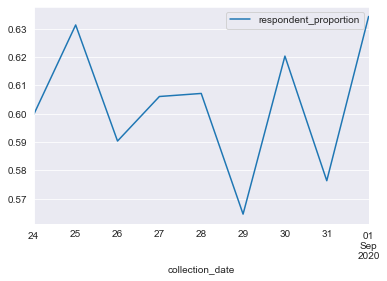

In [23]:
import matplotlib.pyplot as plt # importing matplotlib
import seaborn as sns # importing seaborn
import numpy as np
sns.set_style('darkgrid')
plt.figure(figsize=(16,12))
MLA_dissatisfaction_proportion.plot.line(x='collection_date',y='respondent_proportion')

## 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [24]:
pivoted_result=survey.pivot_table(index='Past_Vote',columns='Vote_Now',values='response_id',aggfunc='count').fillna(value=0,axis=0)
pivoted_result

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,0.0,1.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,0.0,25.0,0.0,1.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0,0.0,6.0,4.0,0.0,1.0,0.0
INC,0.0,6.0,6.0,0.0,0.0,57.0,10.0,9.0,0.0,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,0.0
JAP(L),0.0,0.0,4.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,0.0,0.0,76.0,1.0,0.0,4.0,3.0,6.0,9.0,2.0,3.0,0.0,2.0,17.0,1.0,0.0,1.0,0.0
Left Front,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0


## 10. Repeat the above question with the cell values as the sum of “weight”.

In [25]:
pivoted_result=survey.pivot_table(index='Past_Vote',columns='Vote_Now',values='weight',aggfunc='sum').fillna(value=0,axis=0)
pivoted_result

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,0.000000,1.654731,5.174487,32.010277,0.000000,2.298223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,0.000000,25.348884,0.000000,1.648856,0.000000,0.712161,1.006719,2.496424,0.000000,0.928984,0.000000,0.000000,7.713008,1.903148,0.000000,0.039564,0.000000
INC,0.000000,11.105958,1.642875,0.000000,0.000000,161.742302,18.942597,11.077323,0.000000,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,0.000000
JAP(L),0.000000,0.000000,6.512846,0.000000,0.000000,0.000000,57.876224,0.000000,0.000000,0.000000,0.000000,3.195682,0.000000,2.164824,0.000000,0.000000,0.000000,0.000000
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,0.000000,0.000000,85.010450,2.481377,0.000000,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,0.000000,1.927965,30.737989,0.478933,0.000000,1.709409,0.000000
Left Front,0.000000,2.298223,0.209586,0.000000,0.000000,2.291368,0.000000,0.000000,0.000000,44.280864,0.201455,8.309203,0.000000,6.740281,0.000000,0.877960,0.000000,3.020887


## 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [26]:
age_group_count_by_sample=survey.groupby('age_group').agg({'response_id':'count'}).reset_index()
age_group_count_by_sample=age_group_count_by_sample.rename(columns={'response_id':'overall_response'})
age_group_count_by_sample

,age_group,overall_response
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,108


## 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [27]:
age_group_for_jdu=survey[survey['Vote_Now']=='JD(U)']
age_group_for_jdu=age_group_for_jdu.groupby('age_group').agg({'response_id':'count'})
age_group_for_jdu=age_group_for_jdu.rename(columns={'response_id':'JDU_responce_by_age_group'}).reset_index()
age_group_for_jdu

,age_group,JDU_responce_by_age_group
0,18-25,181
1,25-40,264
2,40-55,68
3,55+,10


## 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as  age_group.

In [28]:
merged_result=age_group_count_by_sample.merge(age_group_for_jdu,how='inner',left_on='age_group',right_on='age_group')
merged_result

,age_group,overall_response,JDU_responce_by_age_group
0,18-25,2094,181
1,25-40,3844,264
2,40-55,801,68
3,55+,108,10
